<a href="https://colab.research.google.com/github/bkkaggle/pytorch-CycleGAN-and-pix2pix/blob/master/pix2pix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize wandb results

In [1]:
#path = "/net/coxfs01/srv/export/coxfs01/pfister_lab2/share_root/Lab/scajas/pytorch-CycleGAN-and-pix2pix/experiments/small_artifacts_06_10_22/files/media/images"
#path = "/net/coxfs01/srv/export/coxfs01/pfister_lab2/share_root/Lab/scajas/pytorch-CycleGAN-and-pix2pix/test_results/vcg_19_ch_upsampled/files/media/images/"
#path = "/net/coxfs01/srv/export/coxfs01/pfister_lab2/share_root/Lab/scajas/pytorch-CycleGAN-and-pix2pix/experiments/vcg_19_ch_upsampled/files/media/images"
path = "/net/coxfs01/srv/export/coxfs01/pfister_lab2/share_root/Lab/scajas/pytorch-CycleGAN-and-pix2pix/wandb/vcg_augmented_horiz_v3_500_epochs/files/media/images"

In [2]:
import os 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from skimage import io

import os.path

%matplotlib inline

def plot_imgs(imgs, titles):
    """
    Generate visualization of list of arrays
    :param imgs: list of arrays, each numpy array is an image of size (width, height)
    :param titles: list of titles [string]
    """
    # create figure
    fig = plt.figure(figsize=(70, 70))
    # loop over images
    for i in range(len(imgs)):
        fig.add_subplot(4, 4, i + 1)
        plt.imshow(imgs[i])
        plt.title(str(titles[i]))
        plt.axis("off")
        
def return_list_of_matches(key, elements):
    """
    uses the key (identifier for each generated image) and 
    returns on a list all the elemets on the path that contain that key.
    In general should be Real A, Fake B, Real B
    """
    lista_elementos = []
    for i in elements:
        if key in i:
            lista_elementos.append(i)
    return lista_elementos

### Visualize automatically
Improve to read same image all the time

Aligned images:  ['real_A_10344_bea28883ea028d392f55.png', 'fake_B_10344_47824061064dc22cf991.png', 'real_B_10344_d983933ec43ad6389781.png']
Aligned images:  ['real_A_10344_bea28883ea028d392f55.png', 'fake_B_10344_47824061064dc22cf991.png', 'real_B_10344_d983933ec43ad6389781.png']
Aligned images:  ['real_A_10344_bea28883ea028d392f55.png', 'fake_B_10344_47824061064dc22cf991.png', 'real_B_10344_d983933ec43ad6389781.png']


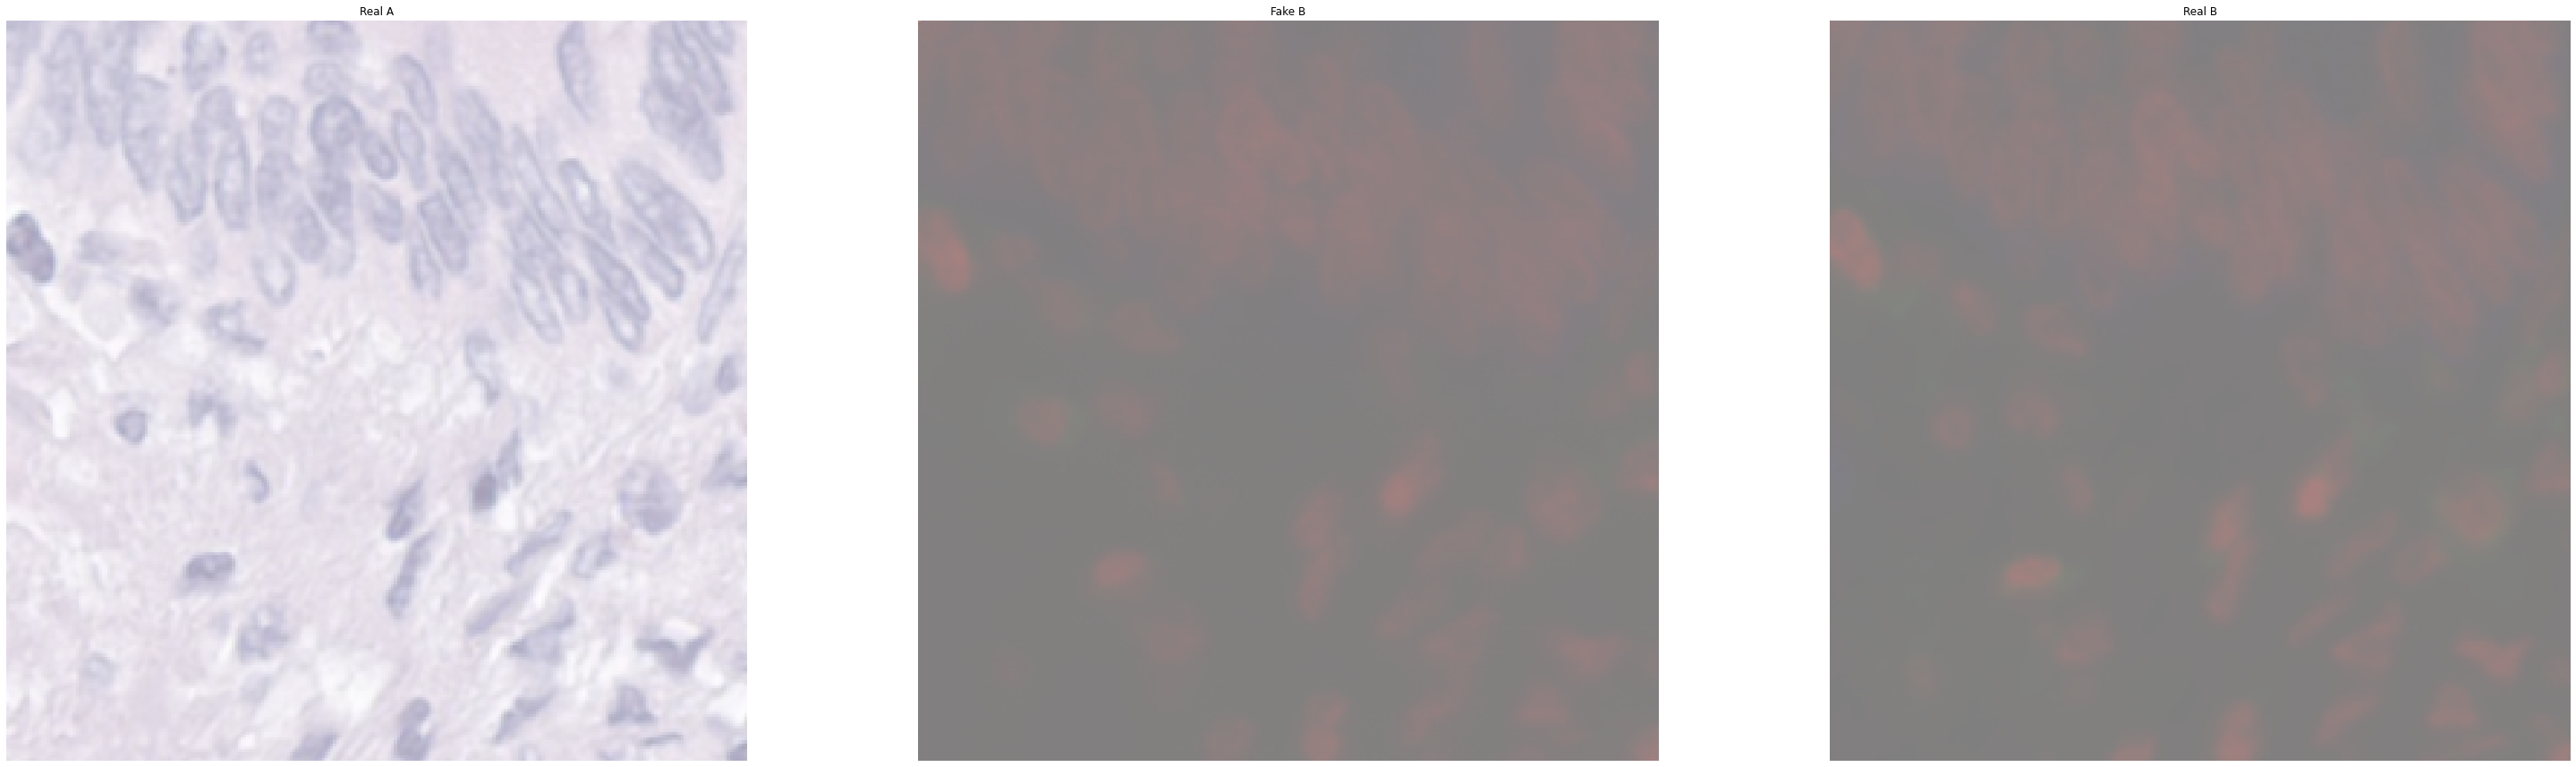

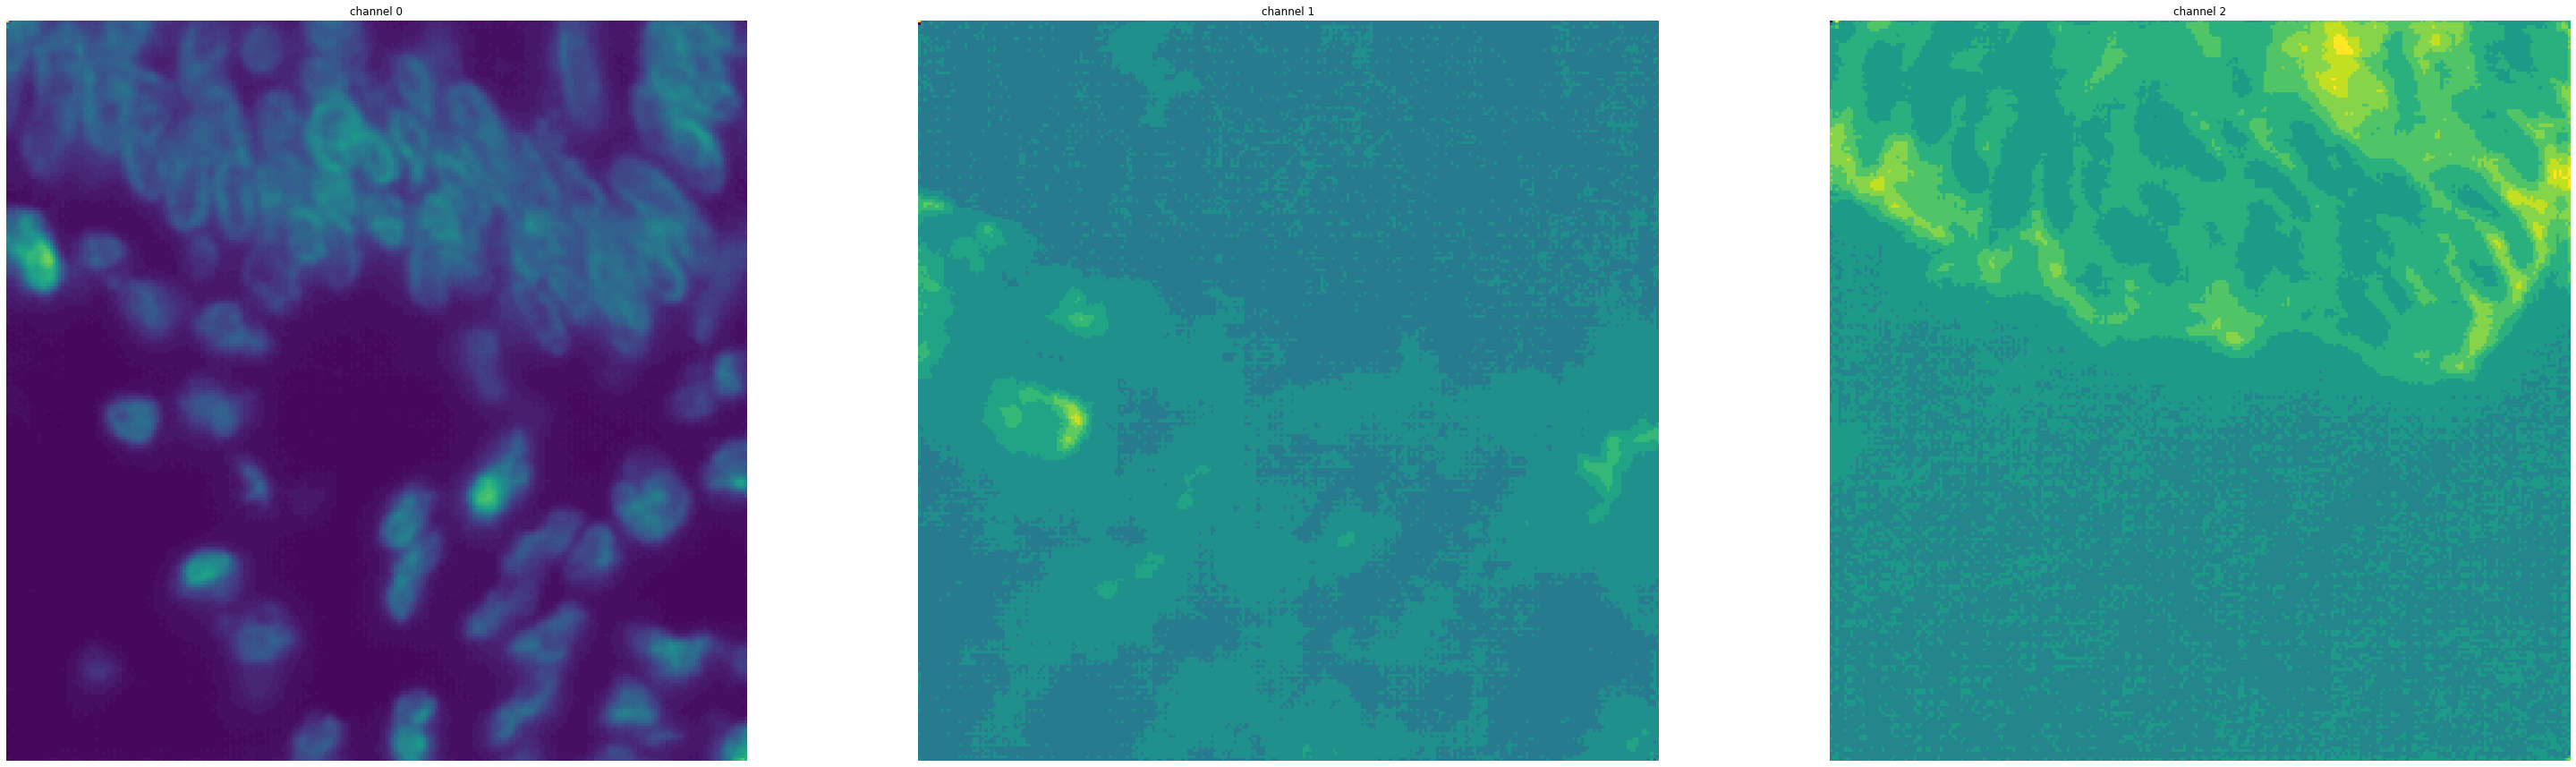

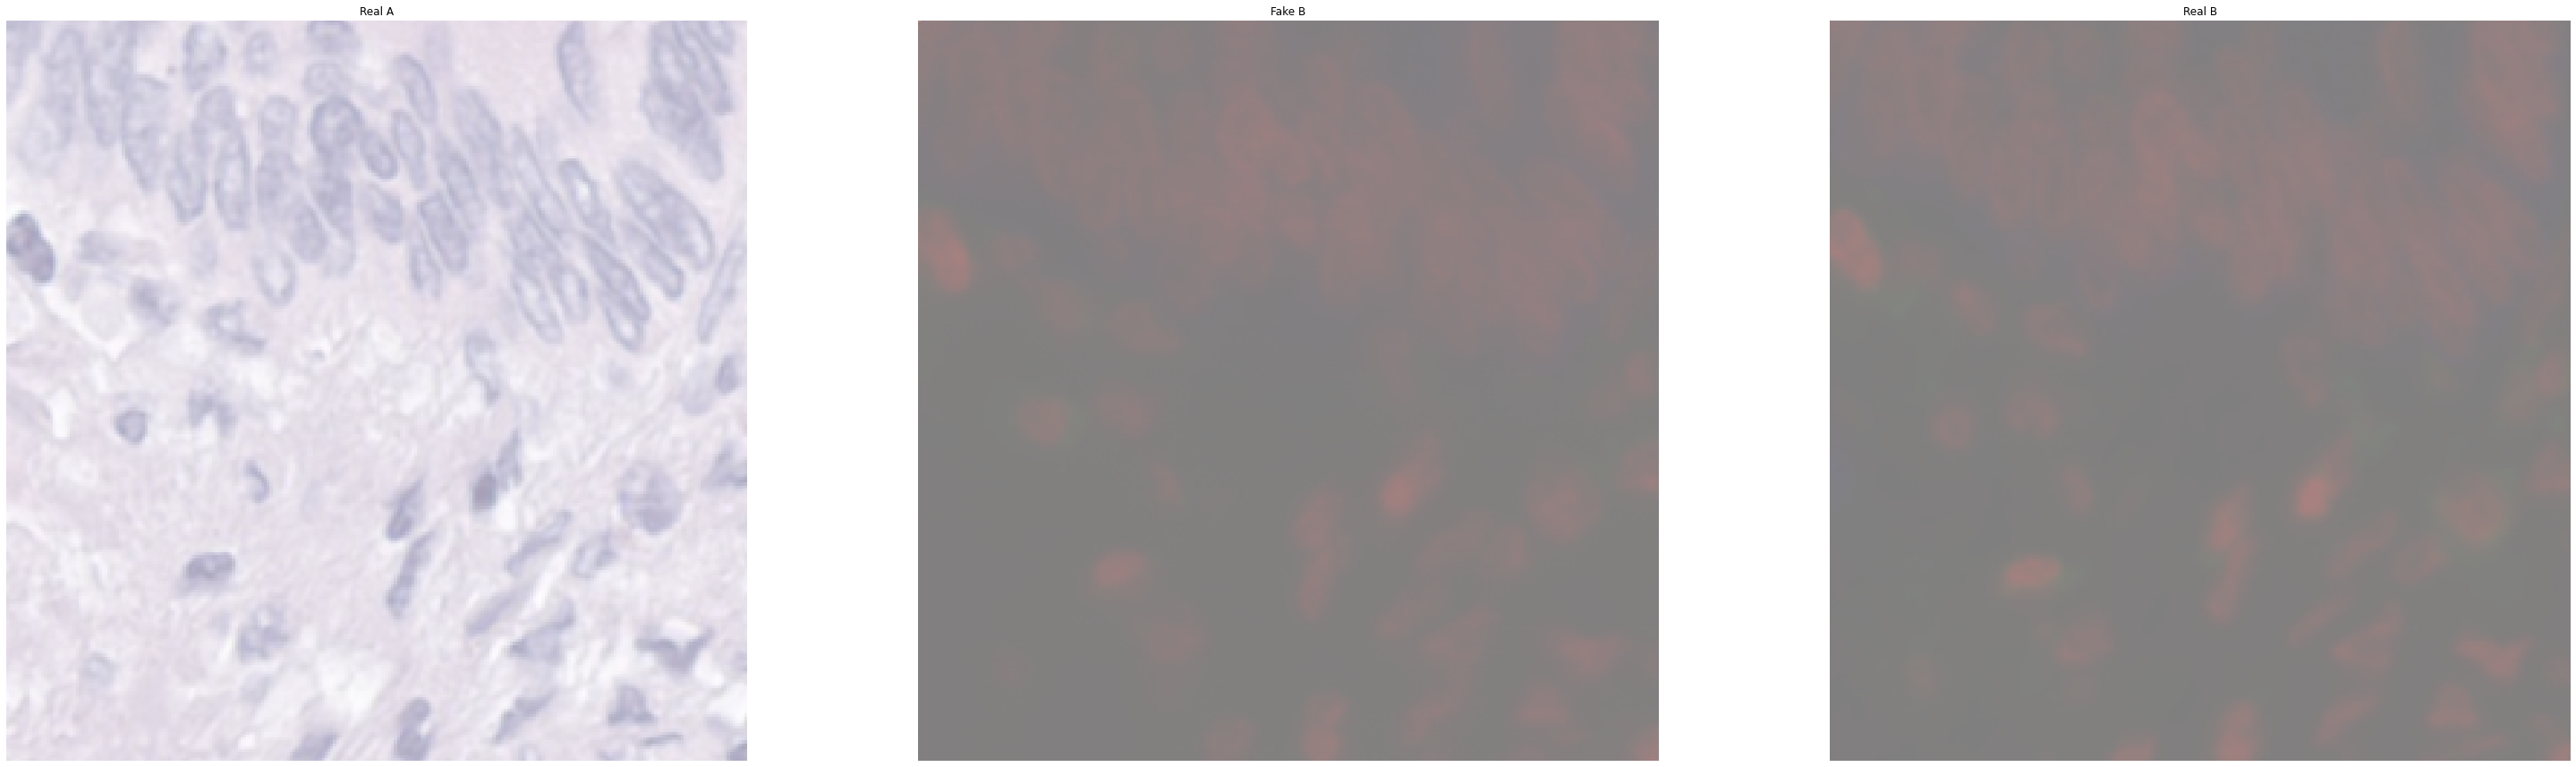

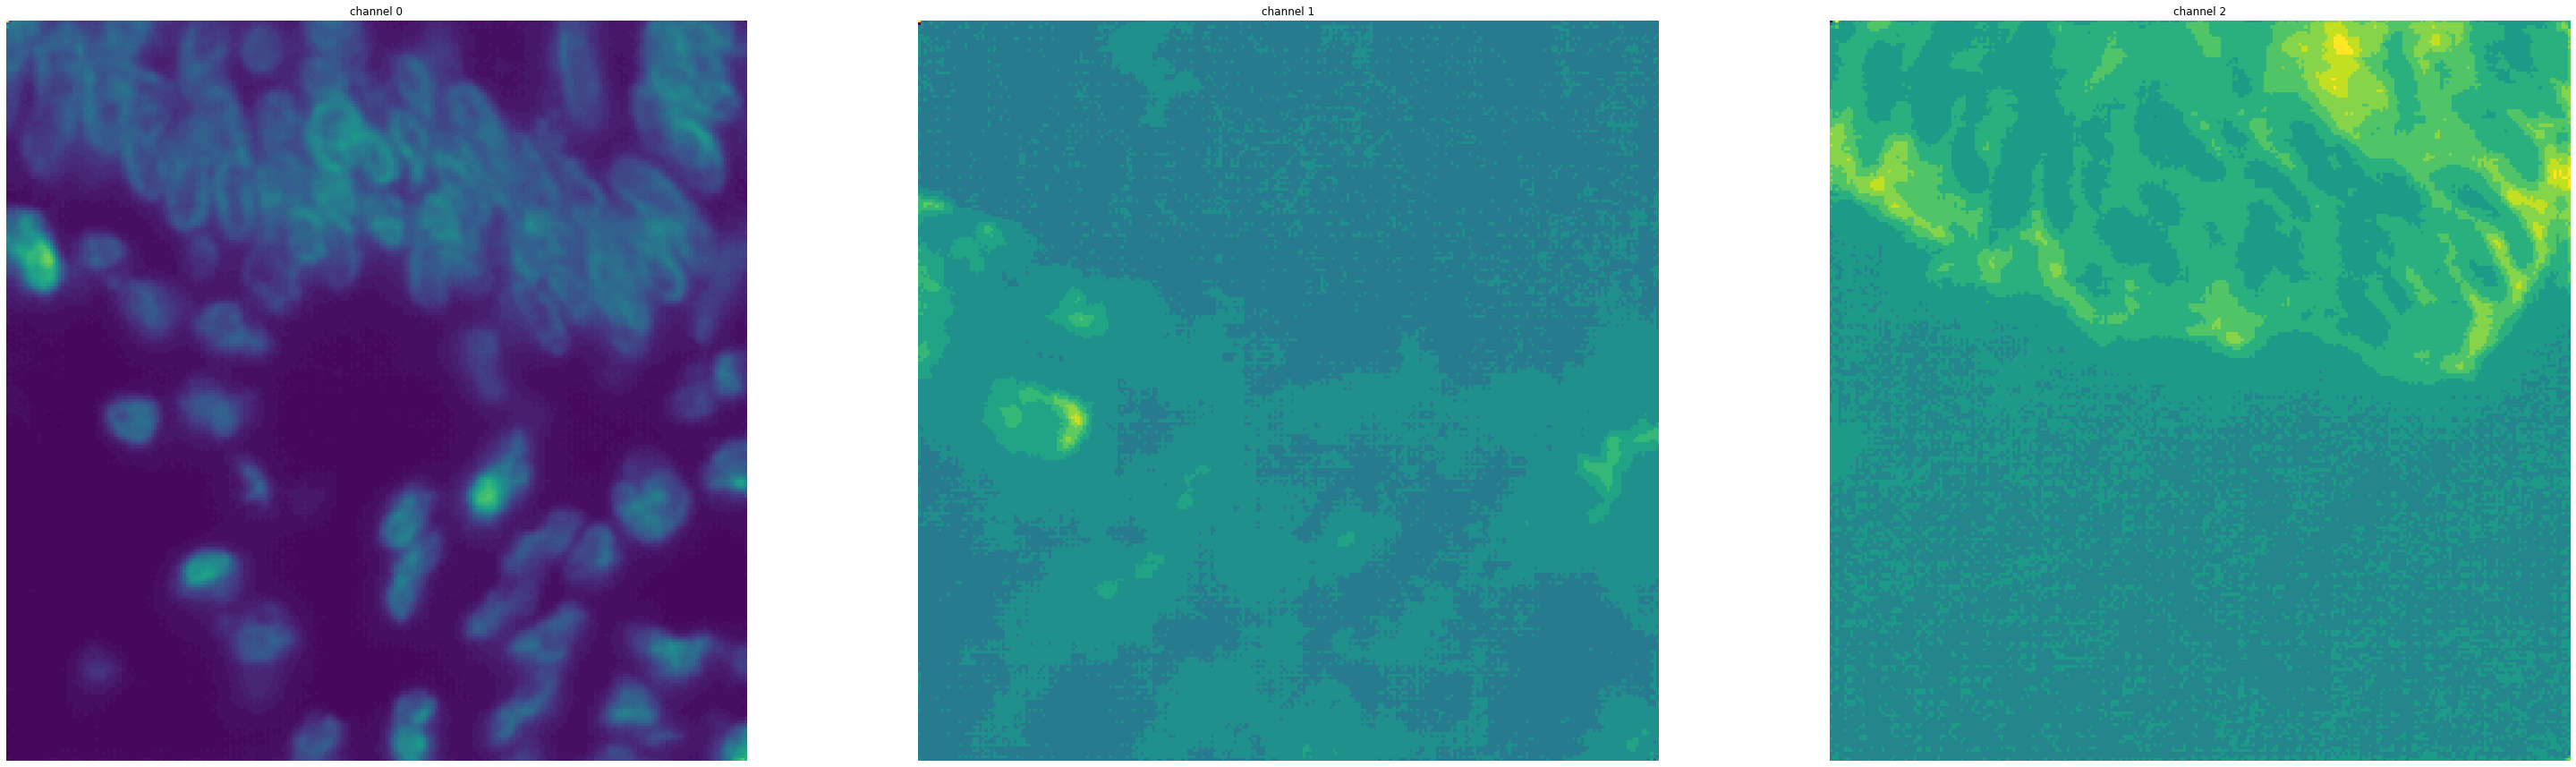

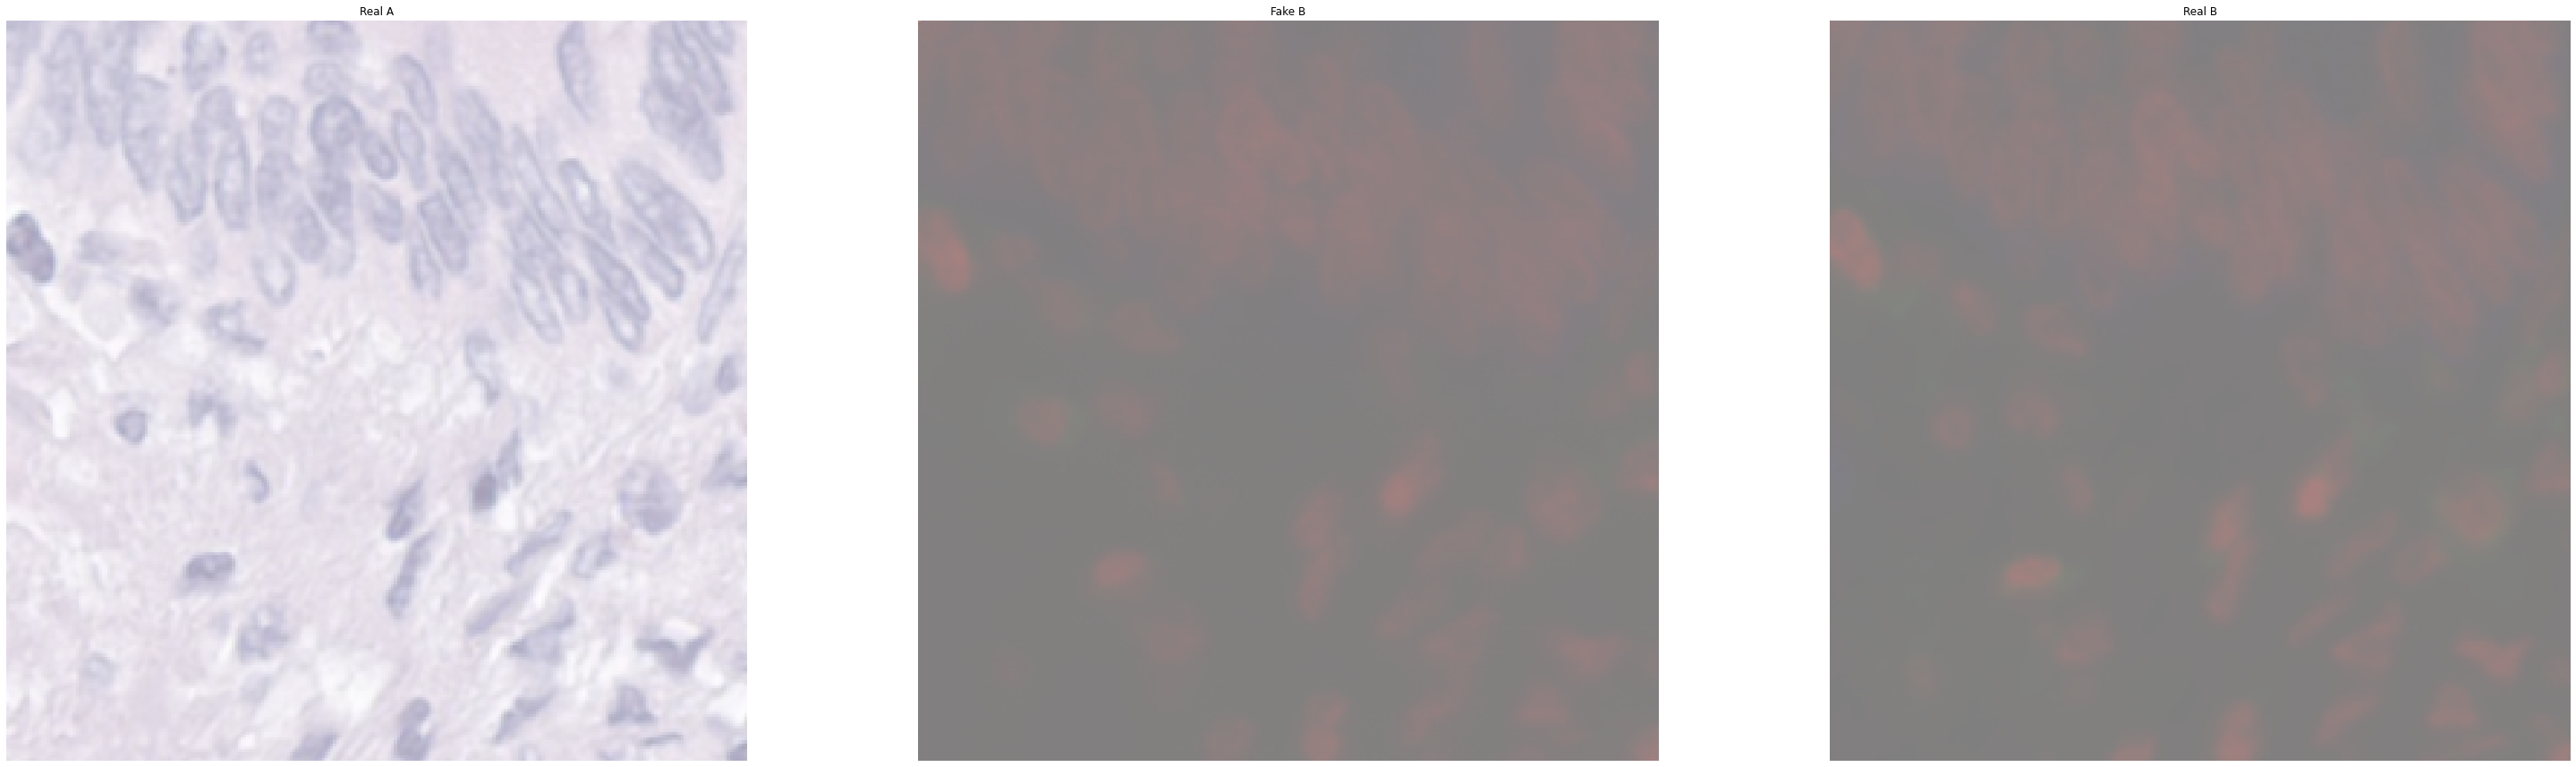

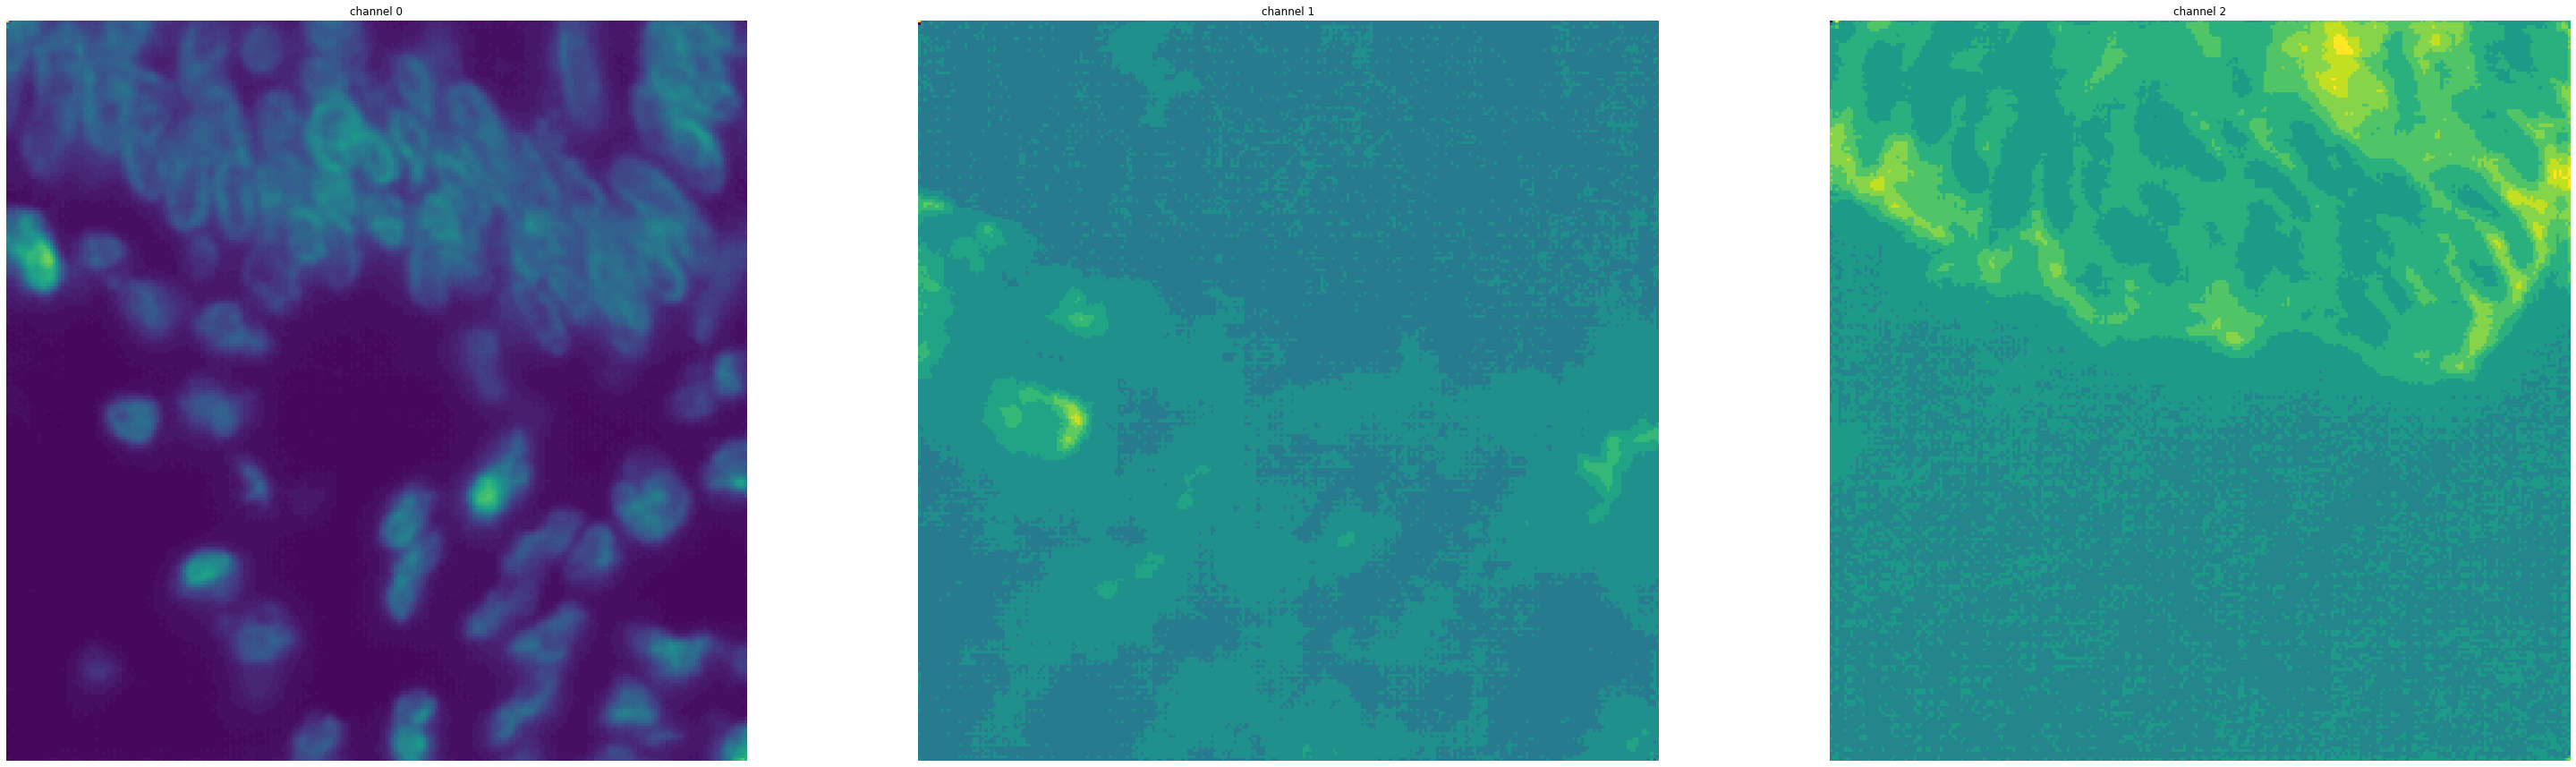

In [3]:
def return_list_of_matches(key, elements):
    lista_elementos = []
    for i in elements:
        if key in i:
            lista_elementos.append(i)
    return lista_elementos

def plot_resultsv1(path,thr):
    idx =0
    for el in reversed(os.listdir(path)):
        if ".png" in el:
            matcher = el.split("_")[2]
            key = "_"+matcher+"_"
            list_of_images = return_list_of_matches(key, os.listdir(path))
            print("Aligned images: ", list_of_images)
            Real_A = io.imread(os.path.join(path, list_of_images[0]))
            Fake_B = io.imread(os.path.join(path, list_of_images[1]))
            Real_B = io.imread(os.path.join(path, list_of_images[2]))
            plot_imgs([Real_A, Fake_B, Real_B], ["Real A", "Fake B", "Real B"])
            plot_imgs([Fake_B[:,:,0], Fake_B[:,:,1], Fake_B[:,:,2]], ["channel 0", "channel 1", "channel 2"])
            #"""
            idx+=1
            if idx ==thr:
                break
plot_resultsv1(path,3)

## Visualize testing results

Aligned images:  ['CRC01-rs_50400-cs_74816_real_A.png', 'CRC01-rs_50400-cs_74816_fake_B.png', 'CRC01-rs_50400-cs_74816_real_B.png']
Aligned images:  ['CRC01-rs_50400-cs_74816_real_A.png', 'CRC01-rs_50400-cs_74816_fake_B.png', 'CRC01-rs_50400-cs_74816_real_B.png']
Aligned images:  ['CRC01-rs_50400-cs_74816_real_A.png', 'CRC01-rs_50400-cs_74816_fake_B.png', 'CRC01-rs_50400-cs_74816_real_B.png']


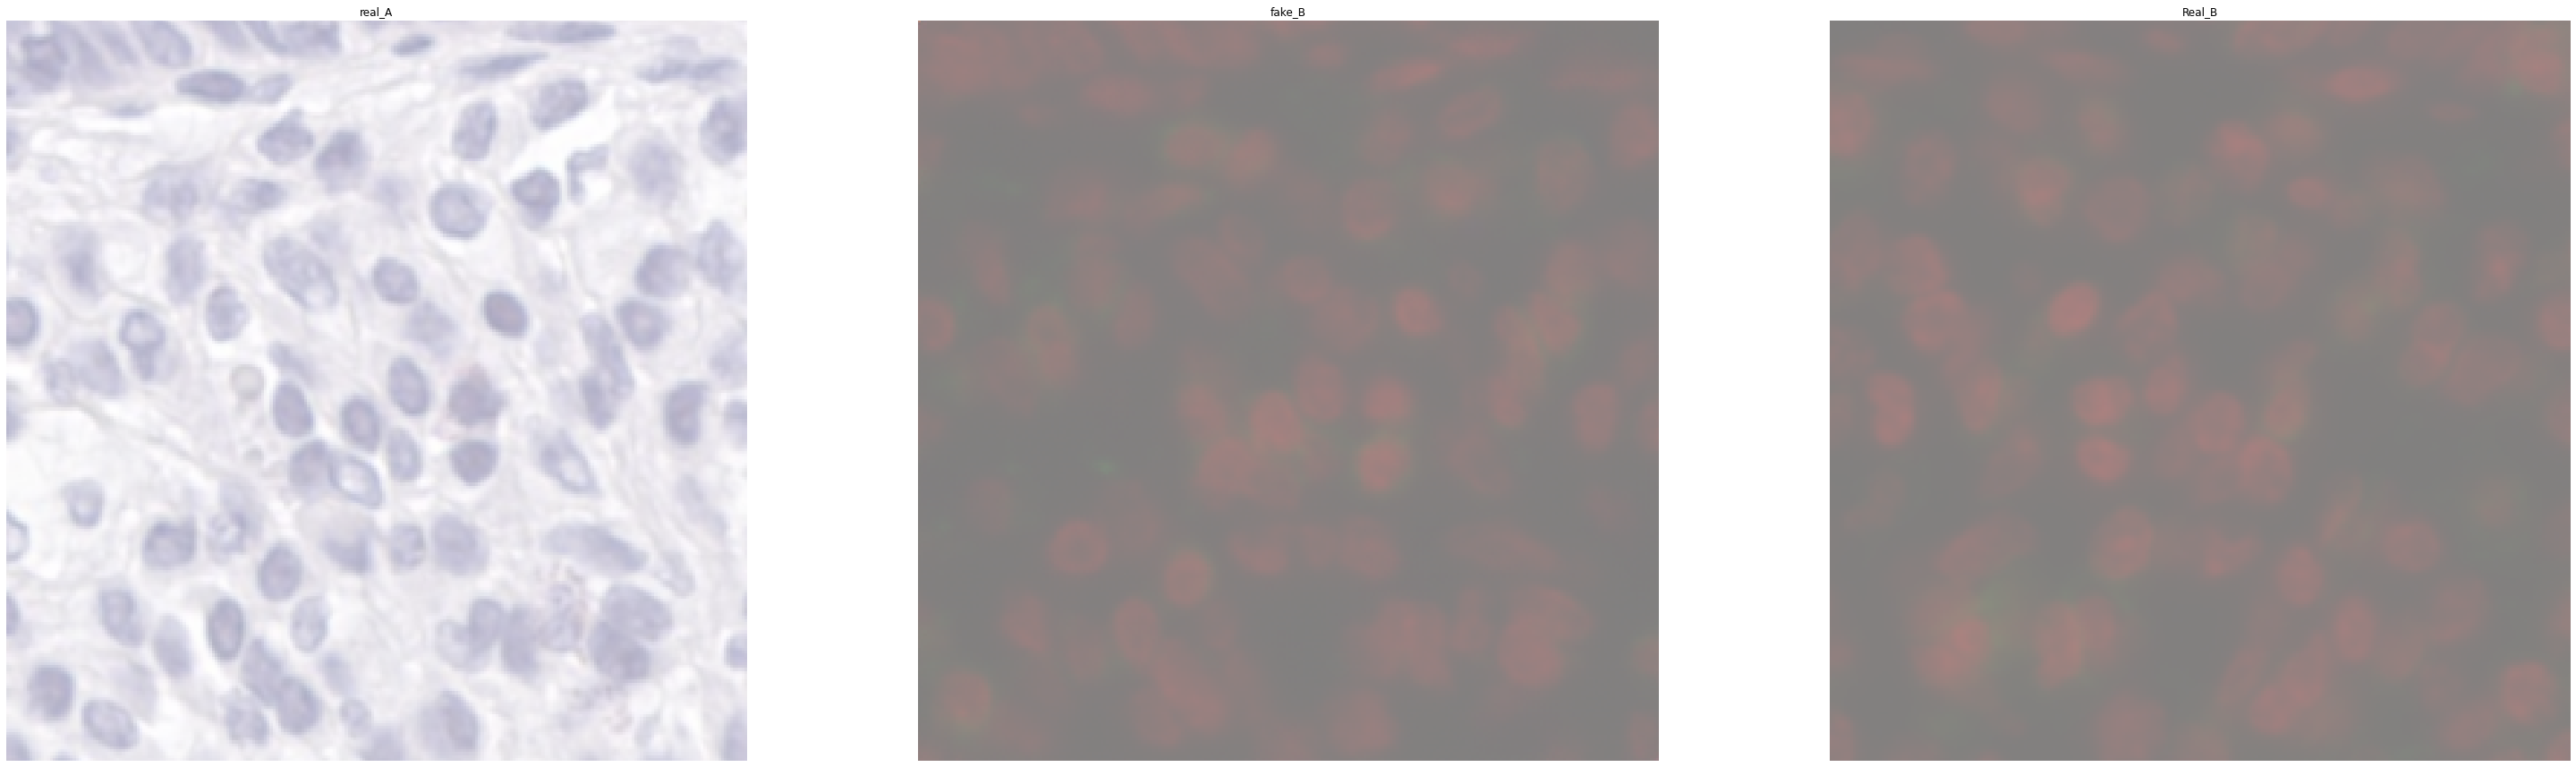

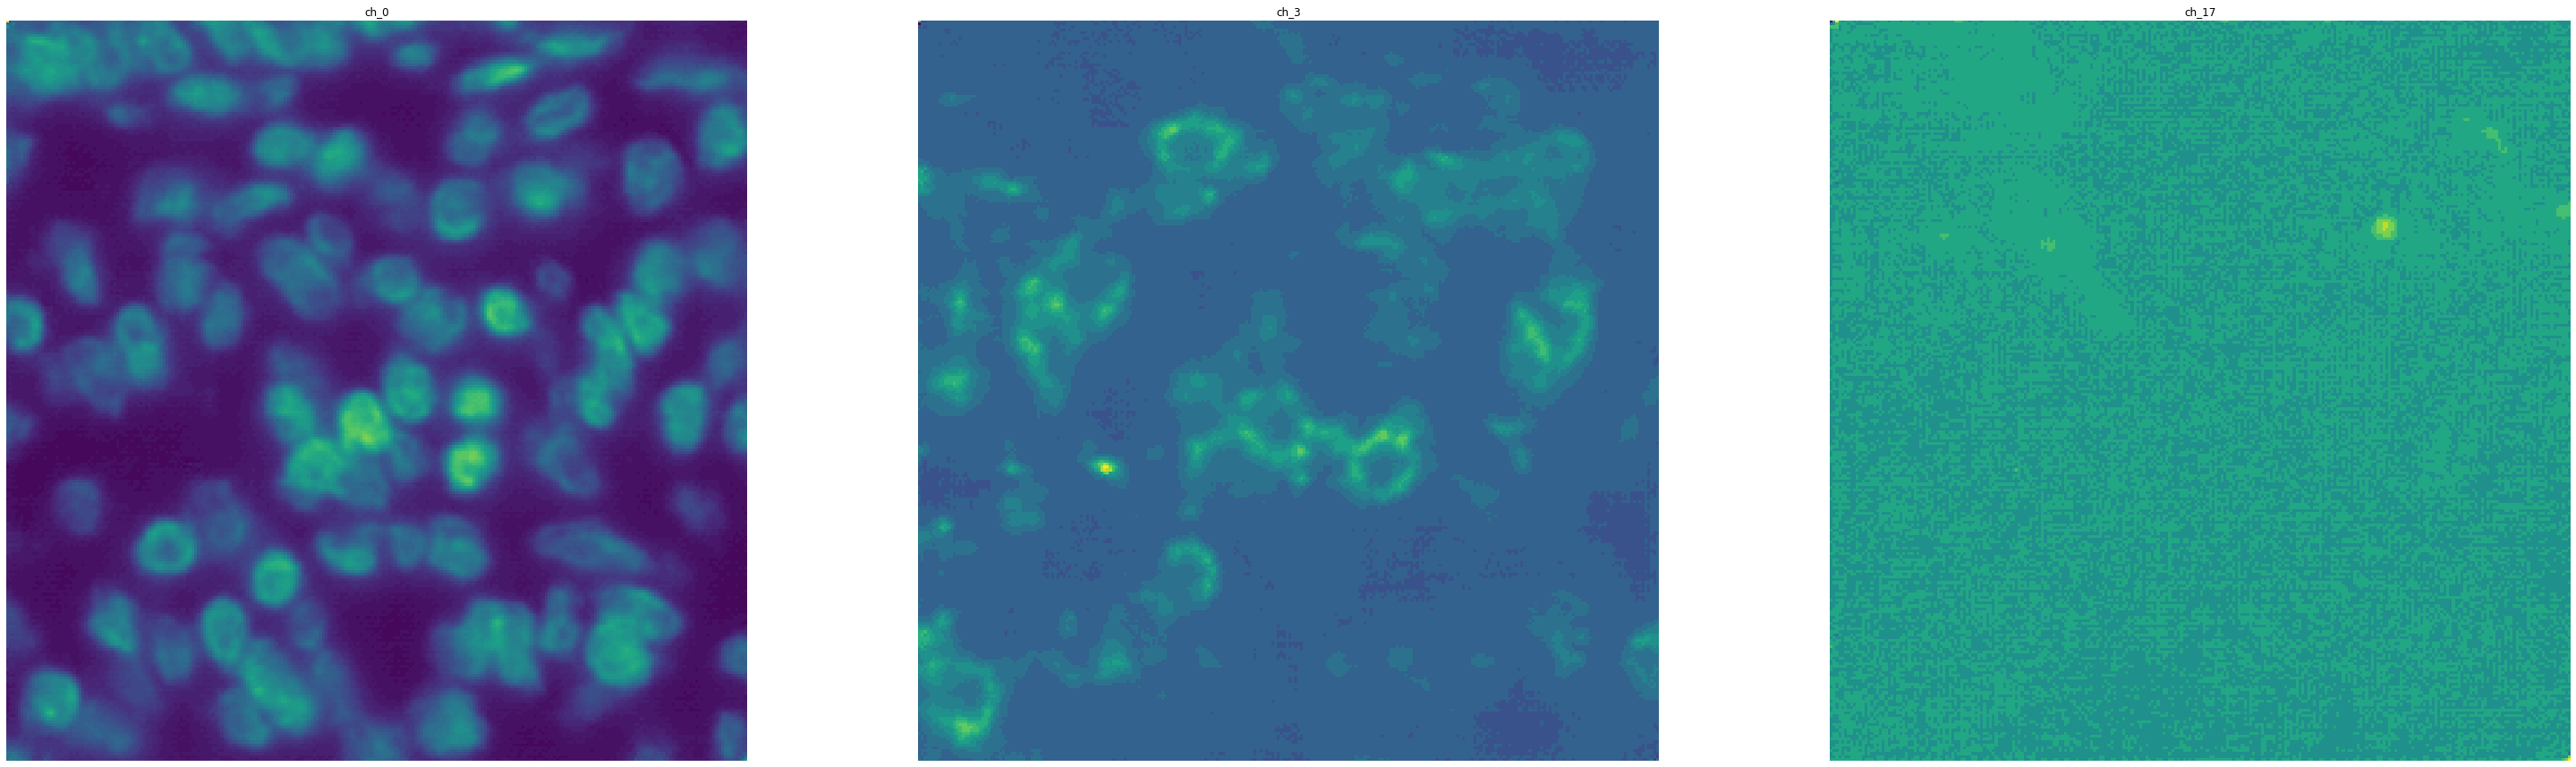

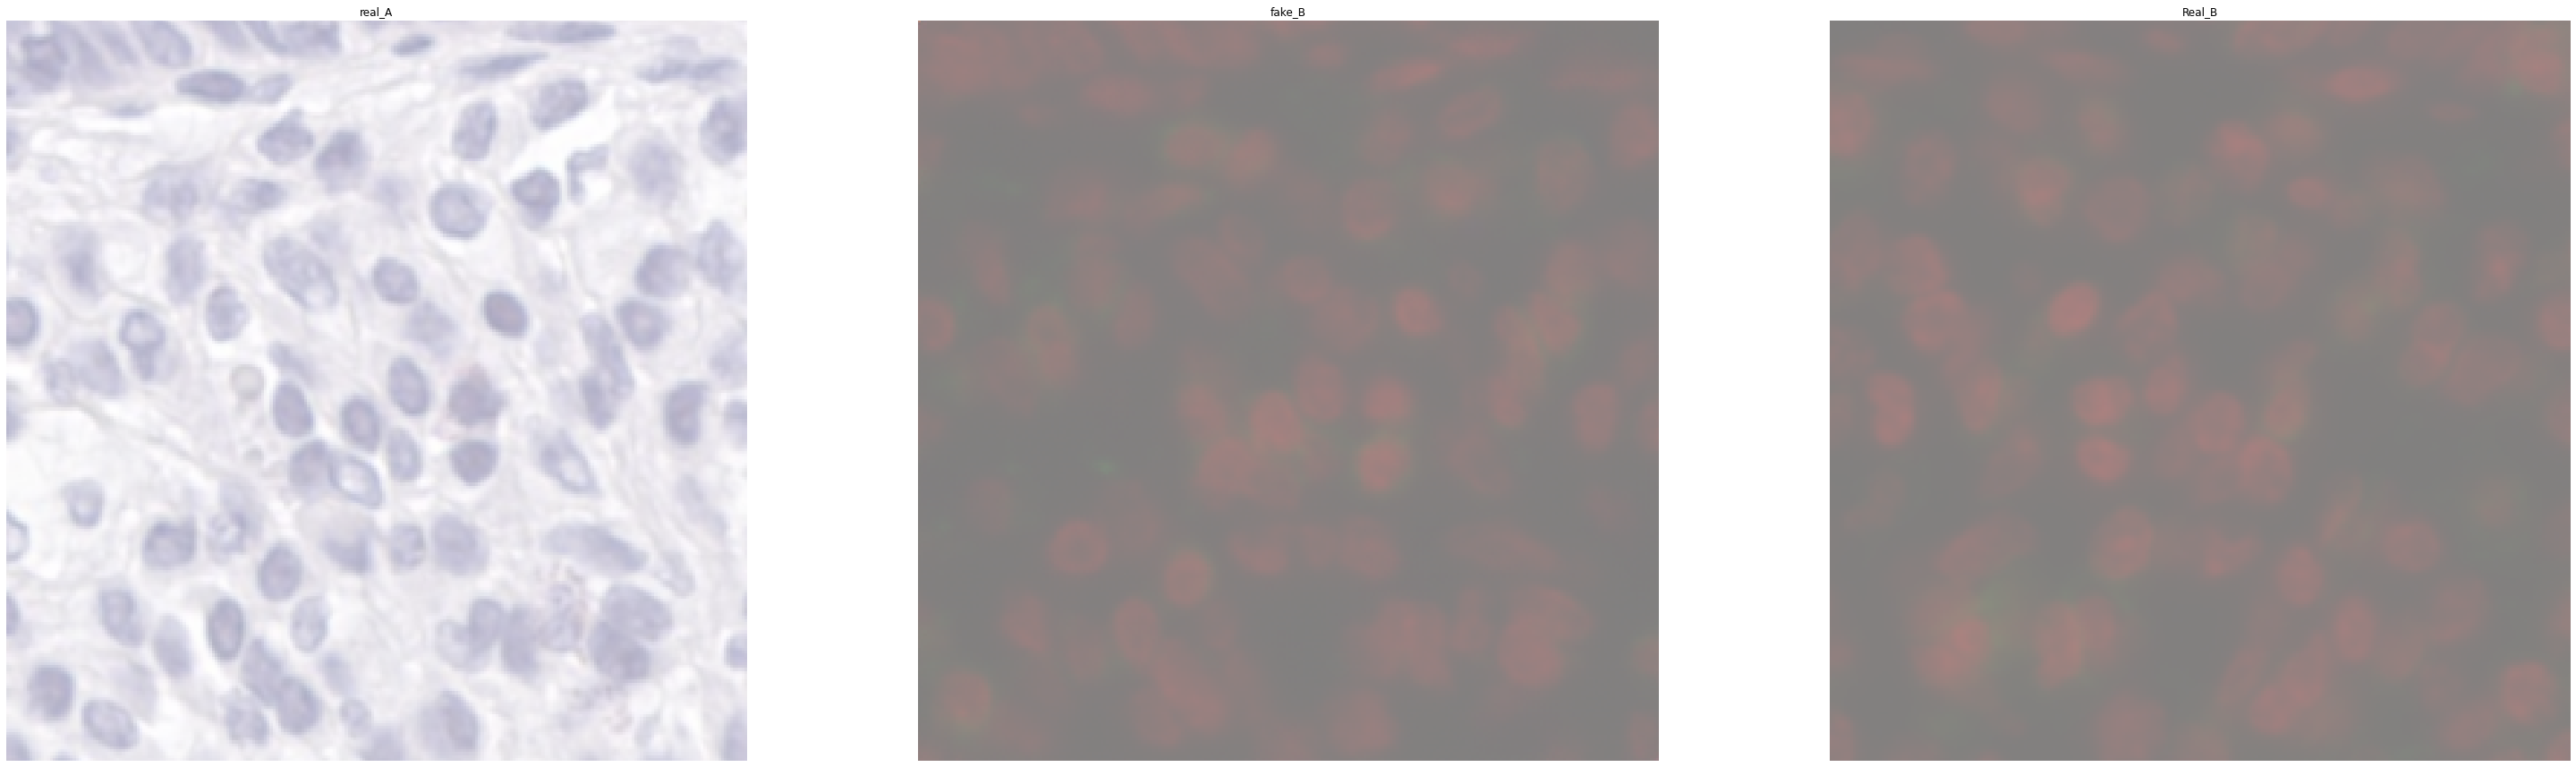

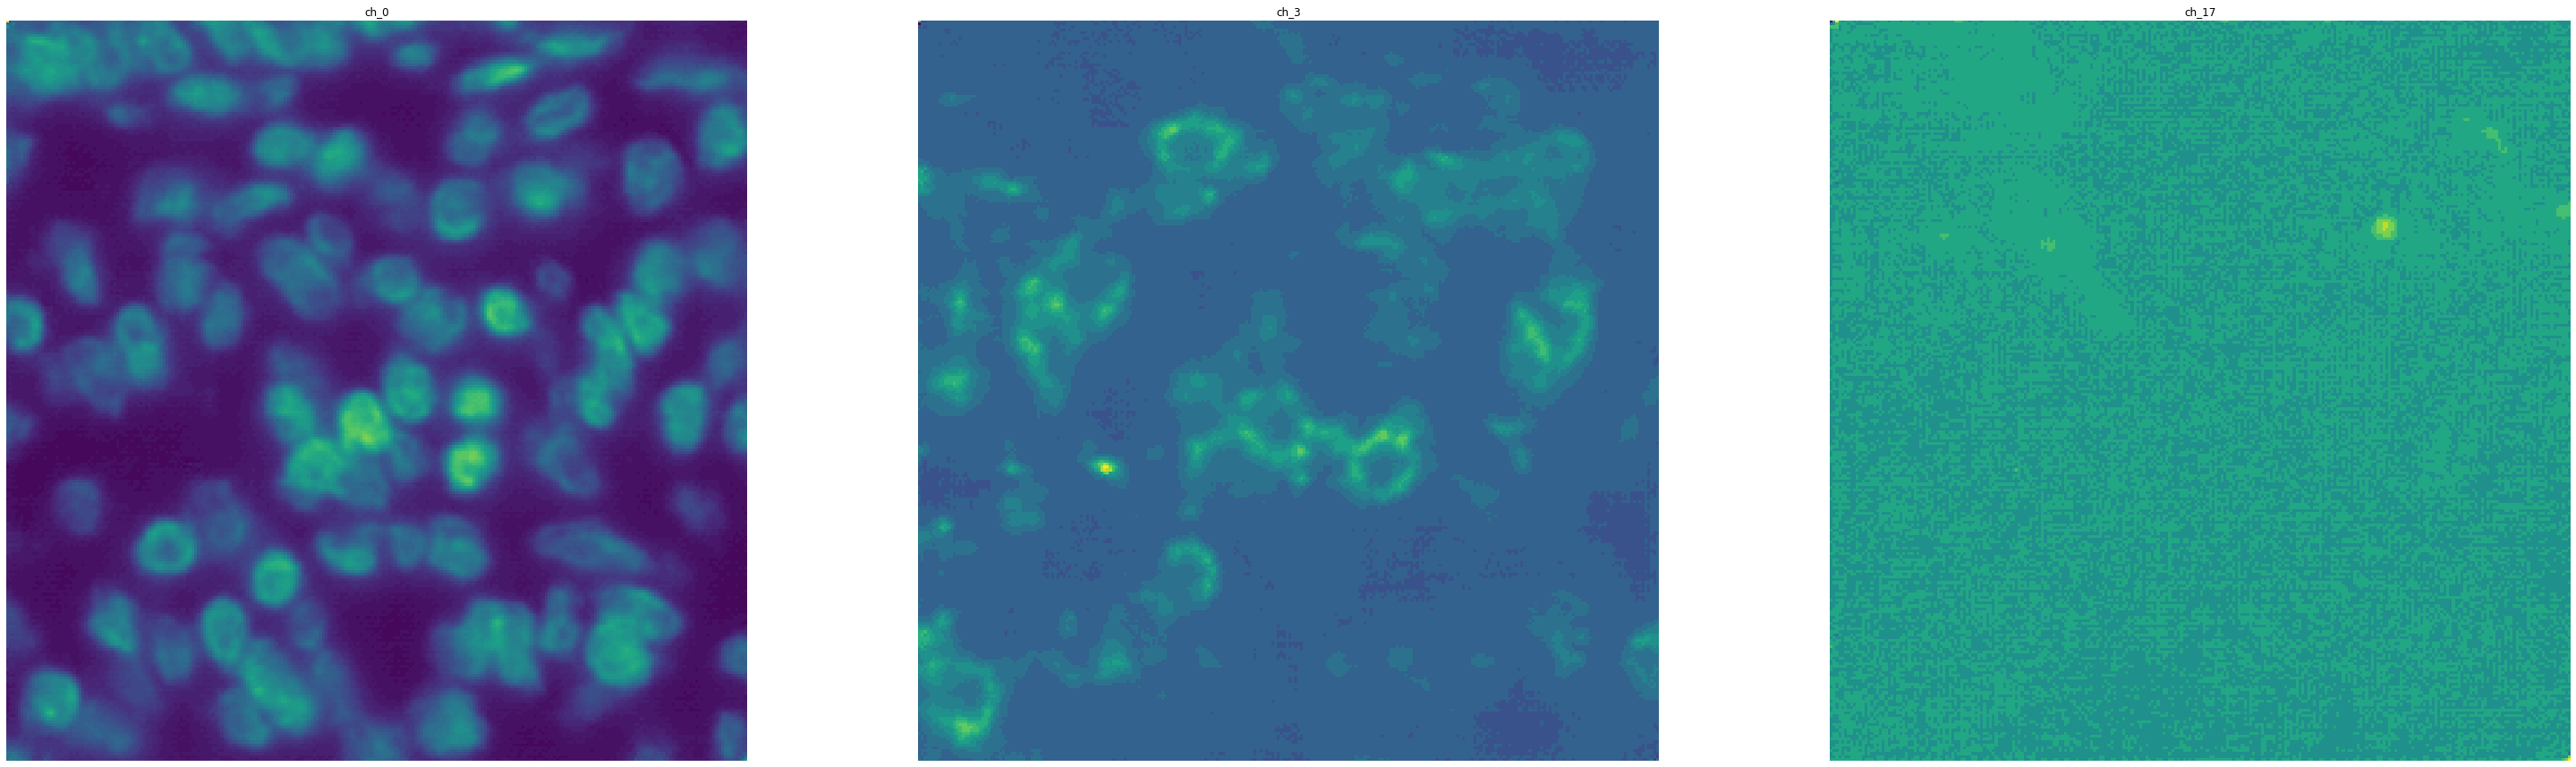

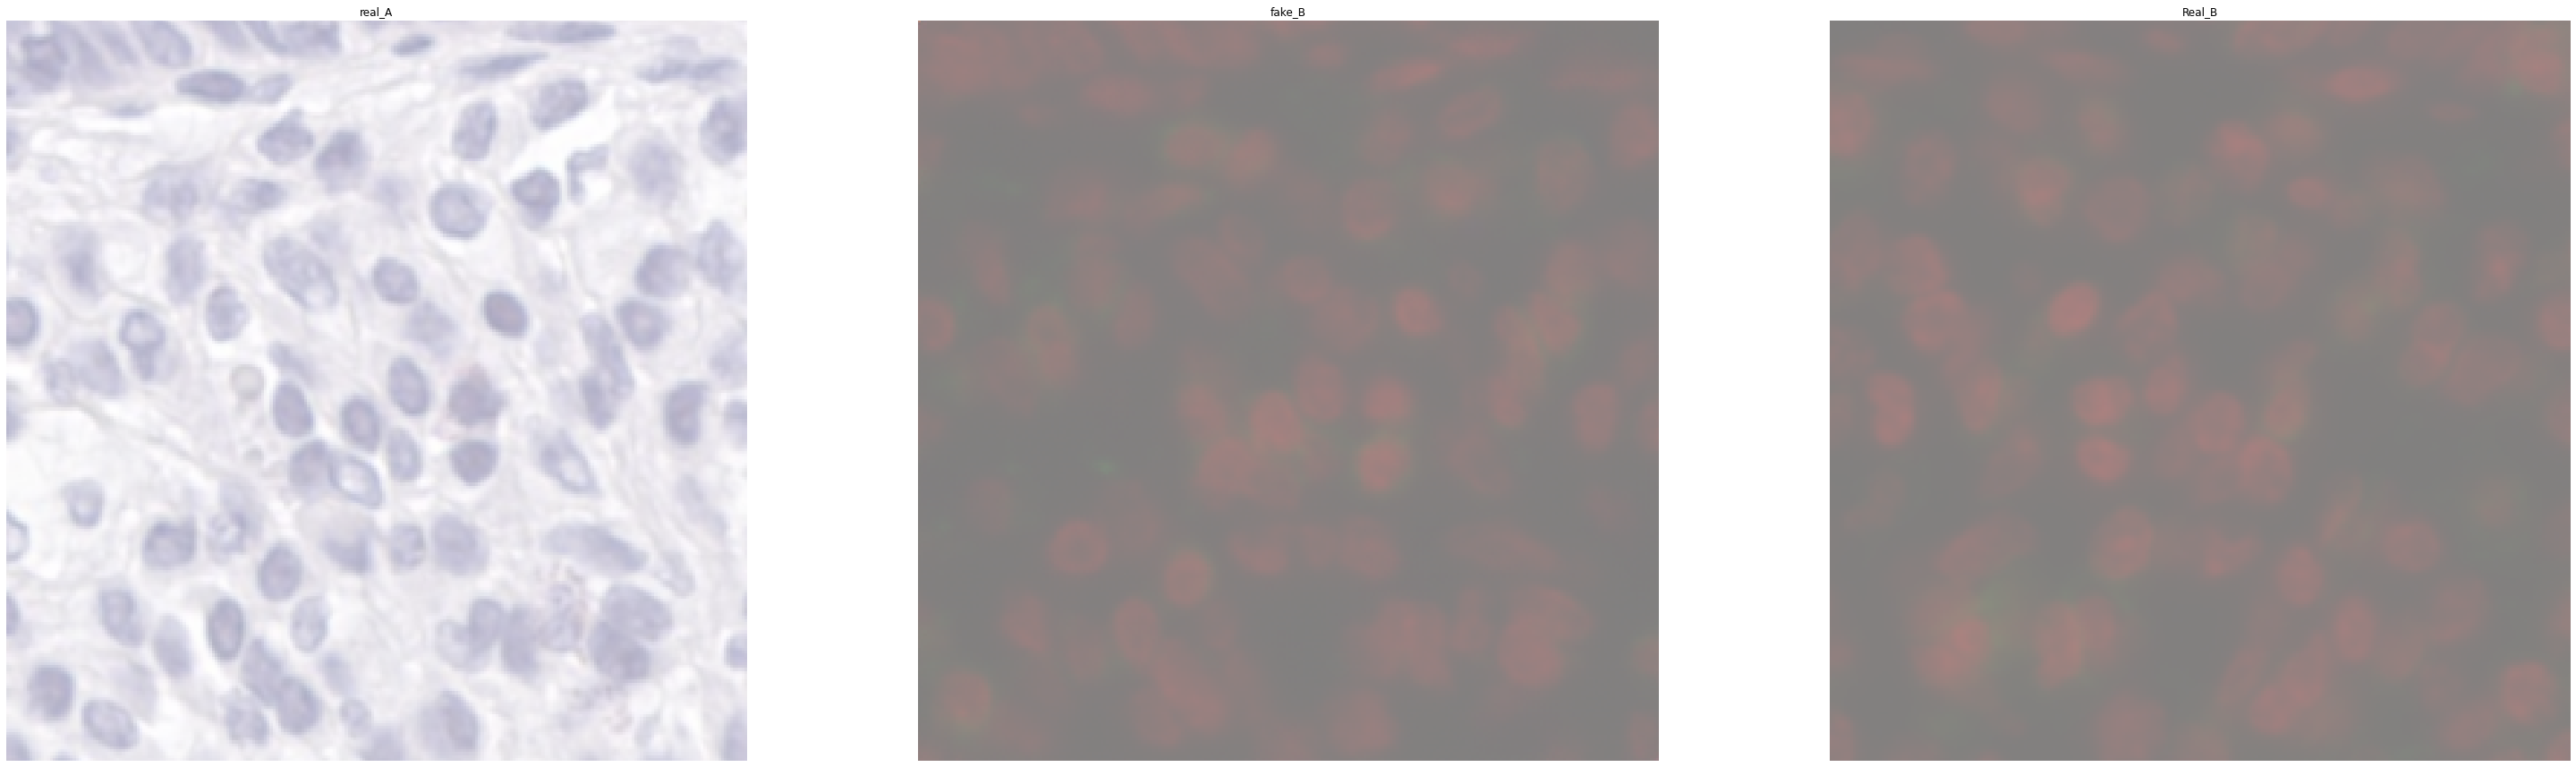

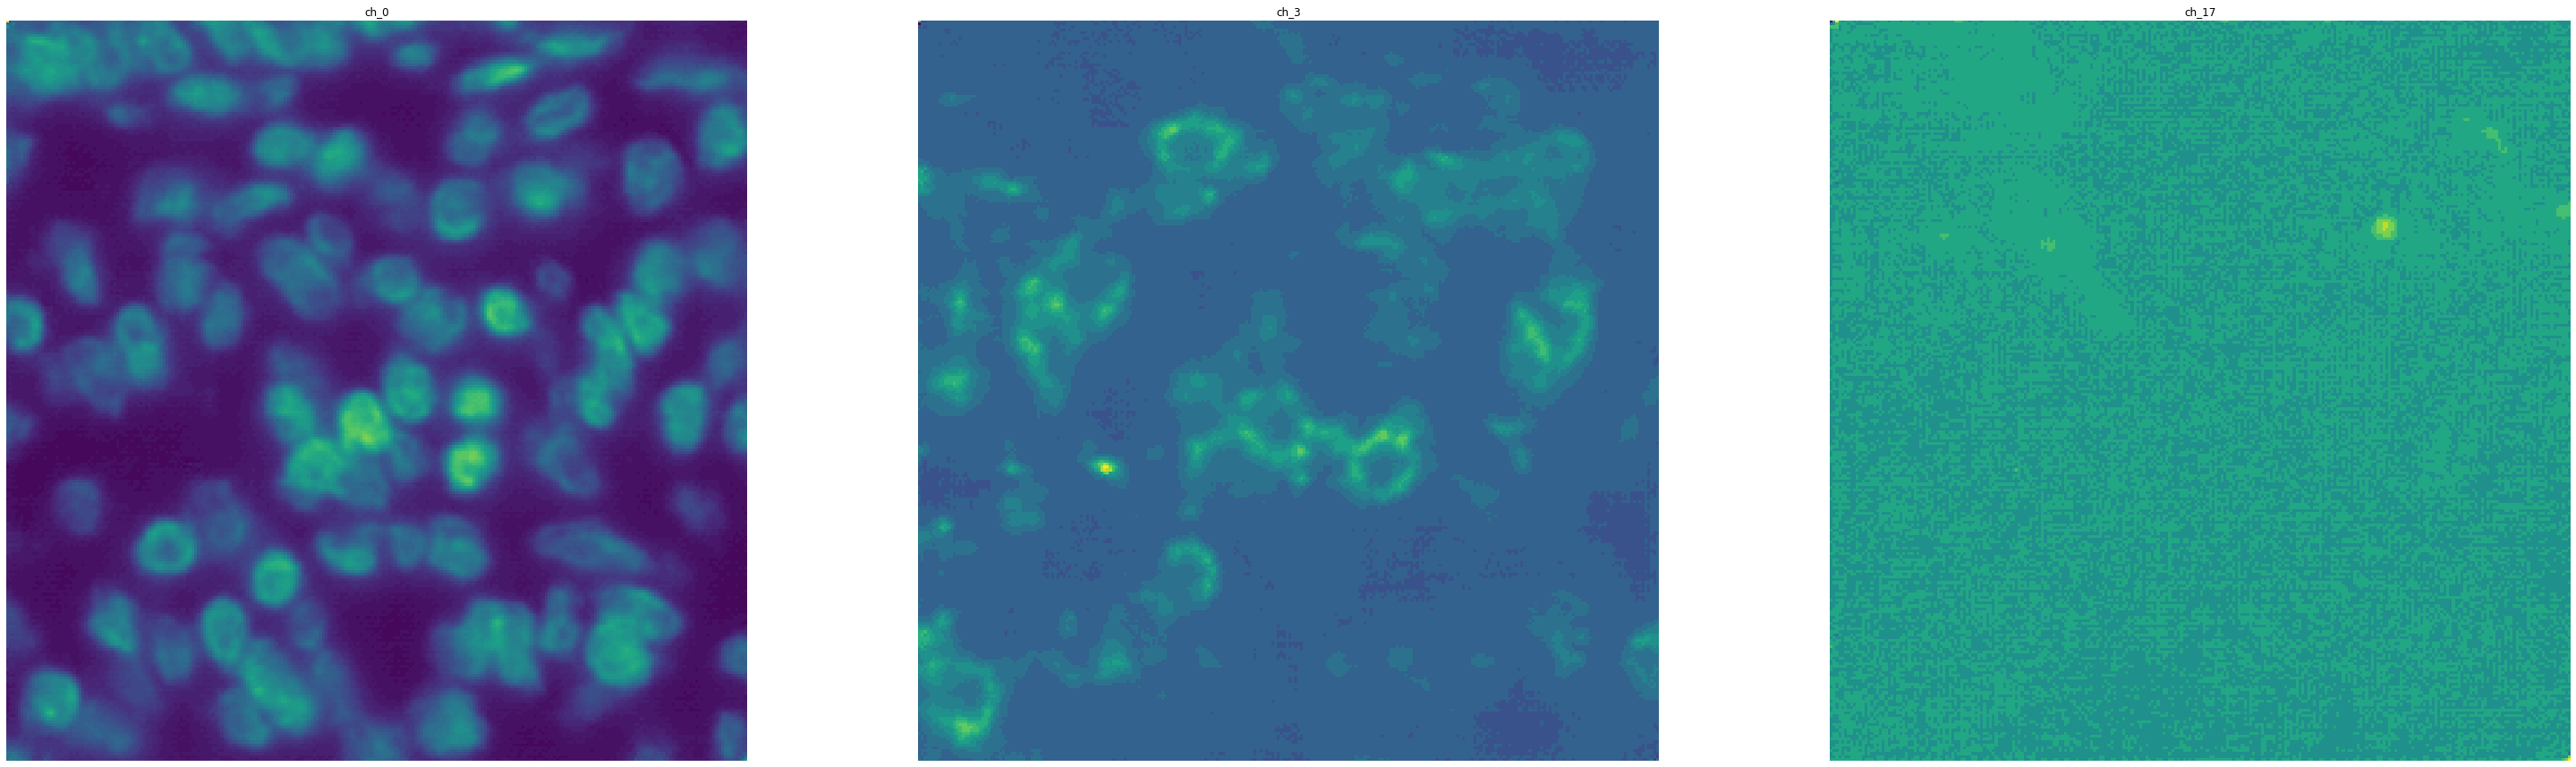

In [10]:
path_results = "/net/coxfs01/srv/export/coxfs01/pfister_lab2/share_root/Lab/scajas/pytorch-CycleGAN-and-pix2pix/tiff/vcg_augmented_horiz_v3_500_epochs/test_latest/images"

def plot_results(path,thr):
    idx =0
    for el in os.listdir(path):
        if ".png" in el:
            key = el[:-10]#png
            #key = "_"+matcher+"_"
            #"""
            list_of_images = return_list_of_matches(key, os.listdir(path))
            print("Aligned images: ", list_of_images)
            Real_A = io.imread(os.path.join(path, list_of_images[0]))
            Fake_B = io.imread(os.path.join(path, list_of_images[1]))
            Real_B = io.imread(os.path.join(path, list_of_images[2]))
            plot_imgs([Real_A, Fake_B, Real_B], ["real_A", "fake_B", "Real_B"])
            plot_imgs([Fake_B[:,:,0], Fake_B[:,:,1], Fake_B[:,:,2]], ["ch_0", "ch_3", "ch_17"])
            #"""
            idx+=1
            if idx ==thr:
                break
        if ".tiff" in el:
            key = el[:-12]#png
            print(key)
            list_of_images = return_list_of_matches(key, os.listdir(path))
            print("Aligned images: ", list_of_images)
            Real_A = io.imread(os.path.join(path, list_of_images[0]))
            Fake_B = io.imread(os.path.join(path, list_of_images[1]))
            Real_B = io.imread(os.path.join(path, list_of_images[2]))
            print(Real_A.shape, Fake_B.shape, Real_B.shape)
            plot_imgs([Real_A, Fake_B, Real_B], ["real_A", "fake_B", "Real_B"])
            
            plot_imgs([Fake_B[:,:,0], Fake_B[:,:,1], Fake_B[:,:,2]], ["ch_0", "ch_1", "ch_2"])
            #plot_imgs([Fake_B[:,:,0], Fake_B[:,:,3], Fake_B[:,:,17]], ["ch_0", "ch_3", "ch_17"])
            #"""
            idx+=1
            if idx ==thr:
                break
            
plot_results(path_results,3)

In [5]:
plot_imgs([Fake_B[:,:,0], Fake_B[:,:,1], Fake_B[:,:,2]], ["ch_0", "ch_1", "ch_2"])

NameError: name 'Fake_B' is not defined